In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-eligibility-data-determining-factors/dataset.csv


In [2]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/kaggle/input/credit-card-eligibility-data-determining-factors/dataset.csv')

In [4]:
data.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [6]:
data['Income_type'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
data[columns_to_encode] = data[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))

# Now, df contains the encoded values


In [8]:
data.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,4,1,0,4,12,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,4,4,1,1,17,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,0,4,3,1,15,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,1,1,2,1,12,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,4,1,1,1,0,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   int64  
 15  Education_type   9709 non-null   int64  
 16  Family_status    9709 non-null   int64  
 17  Housing_type  

In [10]:
data.corr()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
ID,1.000000,0.014427,-0.003829,-0.071906,0.067723,0.005400,-0.025062,-0.029437,0.021149,0.015102,-0.005465,-0.003212,-0.040211,-0.019097,0.012088,-0.006954,0.006295,0.013689,0.000904,0.000384
Gender,0.014427,1.000000,0.355420,-0.056067,0.059095,-0.019123,0.006548,-0.168753,0.054211,0.078460,-0.008431,0.200750,-0.173157,-0.028231,0.085587,0.007809,-0.073405,0.058014,-0.109833,0.015033
Own_car,-0.003829,0.355420,1.000000,-0.010190,0.029406,0.004253,0.022261,-0.145493,0.089565,0.138548,0.025058,0.221874,-0.127670,0.019096,0.040707,-0.096814,-0.124707,-0.002279,-0.092603,-0.006787
Own_property,-0.071906,-0.056067,-0.010190,1.000000,-0.184285,-0.052136,0.056014,0.086675,-0.000480,0.008782,-0.009627,0.025562,0.134602,-0.021443,-0.045539,0.010153,-0.012050,-0.182716,0.022375,-0.028227
Work_phone,0.067723,0.059095,0.029406,-0.184285,1.000000,0.288331,-0.040473,-0.242499,0.052890,0.062499,0.015013,-0.030854,-0.180719,0.107966,0.148185,-0.015379,-0.052364,0.034792,-0.079943,-0.002919
Phone,0.005400,-0.019123,0.004253,-0.052136,0.288331,1.000000,0.007631,0.000066,-0.023997,-0.013669,0.021386,0.021051,0.044856,0.041816,-0.009908,-0.046090,-0.009700,-0.027076,-0.002375,-0.009461
Email,-0.025062,0.006548,0.022261,0.056014,-0.040473,0.007631,1.000000,-0.081081,0.010271,0.004601,-0.024376,0.092321,-0.110262,-0.004703,-0.015065,-0.105466,-0.002141,0.020649,-0.024375,0.007184
Unemployed,-0.029437,-0.168753,-0.145493,0.086675,-0.242499,0.000066,-0.081081,1.000000,-0.224611,-0.212479,0.005605,-0.166422,0.617513,-0.410936,-0.361578,0.115356,0.107131,-0.105767,0.299027,-0.024926
Num_children,0.021149,0.054211,0.089565,-0.000480,0.052890,-0.023997,0.010271,-0.224611,1.000000,0.889970,-0.009064,0.031950,-0.322574,0.039159,0.103998,-0.025980,-0.147216,0.013321,-0.079397,0.011715
Num_family,0.015102,0.078460,0.138548,0.008782,0.062499,-0.013669,0.004601,-0.212479,0.889970,1.000000,0.012132,0.028992,-0.275471,0.055838,0.094410,-0.020336,-0.529024,-0.019316,-0.076416,0.007077


<Axes: >

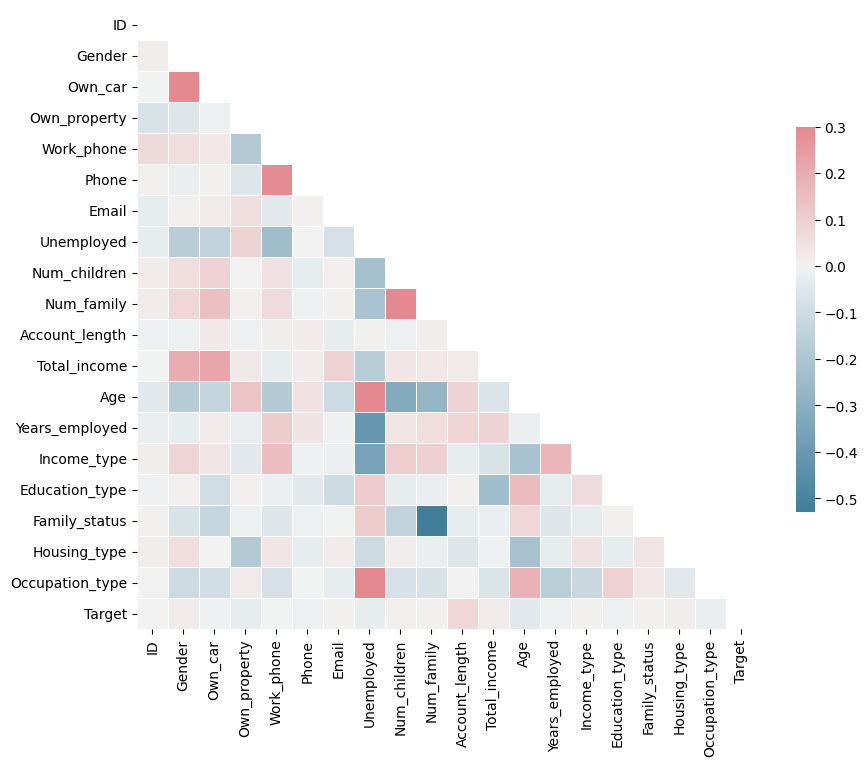

In [11]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
data.drop('ID',axis = 1,inplace = True)

In [15]:
x = data.drop('Target',axis = 1)

In [16]:
y = data['Target']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_sc = sc.transform(x_train)
sc.fit(x_test)
x_test_sc = sc.transform(x_test)

In [19]:
def model_evaluation(model):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm_matrix, annot=True,fmt='d', cmap='Blues')
    TP = cm[0,0]
    TN = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    print('Accuracy : ', (TP+TN)/(TP+TN+FP+FN))
    print('Classification Error : ',(FP + FN) / float(TP + TN + FP + FN),"\n" )
    plt.show()
    print("\n","\n")
def fit_model(models,cross_val=False,cv_val=4):
    for i in models:
        model = models[i]
        model.fit(x_train, y_train)
        print(i,"\n")
        model_evaluation(model)
        if cross_val:
          cv = cross_val_score(model, X, y, cv=cv_val)
          print("Cross Validation : ",cv)
          print("Cross Validation Score : ", np.mean(cv))
          print("\n","\n")

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

Logistic Regression 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1720
           1       0.00      0.00      0.00       222

    accuracy                           0.89      1942
   macro avg       0.44      0.50      0.47      1942
weighted avg       0.78      0.89      0.83      1942

Accuracy :  0.8856848609680742
Classification Error :  0.11431513903192585 



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


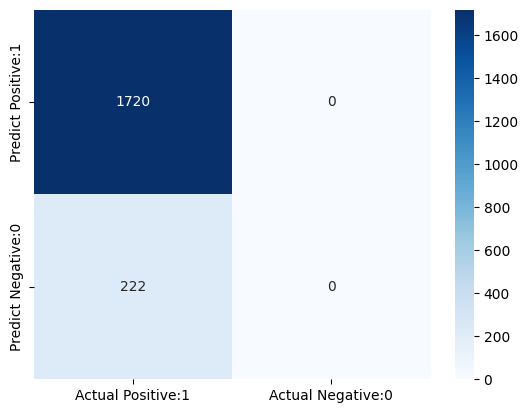


 

Random Forest 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1720
           1       0.67      0.01      0.02       222

    accuracy                           0.89      1942
   macro avg       0.78      0.50      0.48      1942
weighted avg       0.86      0.89      0.83      1942

Accuracy :  0.8861997940267765
Classification Error :  0.11380020597322348 



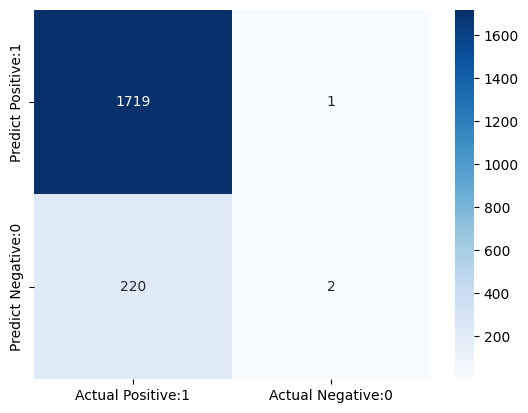


 

Decision Tree 

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1720
           1       0.13      0.18      0.15       222

    accuracy                           0.77      1942
   macro avg       0.51      0.51      0.51      1942
weighted avg       0.80      0.77      0.78      1942

Accuracy :  0.7657054582904222
Classification Error :  0.23429454170957775 



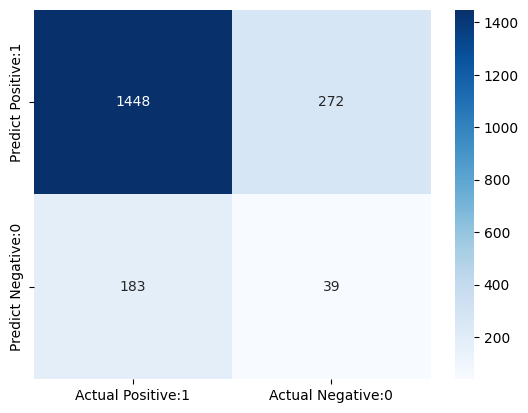


 

XGBoost 

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1720
           1       0.29      0.04      0.06       222

    accuracy                           0.88      1942
   macro avg       0.59      0.51      0.50      1942
weighted avg       0.82      0.88      0.84      1942

Accuracy :  0.8795056642636457
Classification Error :  0.12049433573635428 



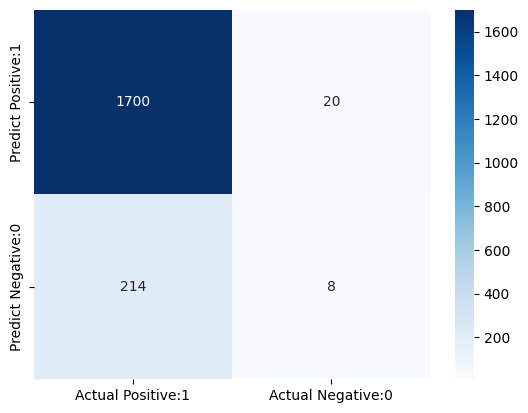


 

Ada Boost Classifier 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1720
           1       0.00      0.00      0.00       222

    accuracy                           0.89      1942
   macro avg       0.44      0.50      0.47      1942
weighted avg       0.78      0.89      0.83      1942

Accuracy :  0.8851699279093718
Classification Error :  0.11483007209062822 



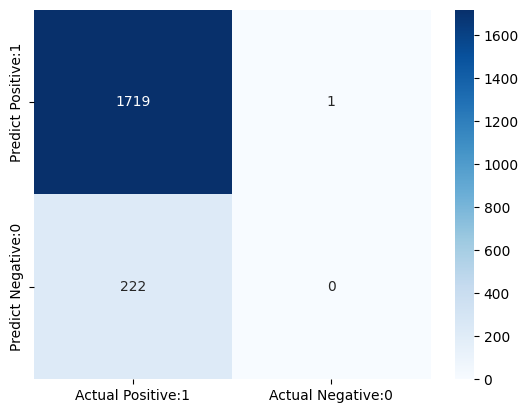


 

Gradient Boosting Classifier 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1720
           1       0.00      0.00      0.00       222

    accuracy                           0.88      1942
   macro avg       0.44      0.50      0.47      1942
weighted avg       0.78      0.88      0.83      1942

Accuracy :  0.884140061791967
Classification Error :  0.11585993820803296 



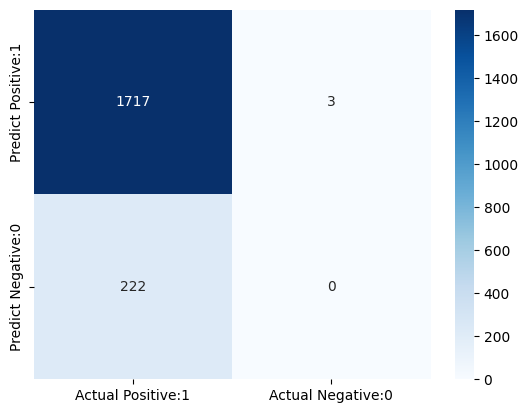

In [21]:
xgb_model = xgb.XGBClassifier()

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb_model,
    'Ada Boost Classifier' : AdaBoostClassifier(),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(),
}


fit_model(models)